## CHAPTER 2 - DESCRIPTIVE STATISTICS (PART 2)

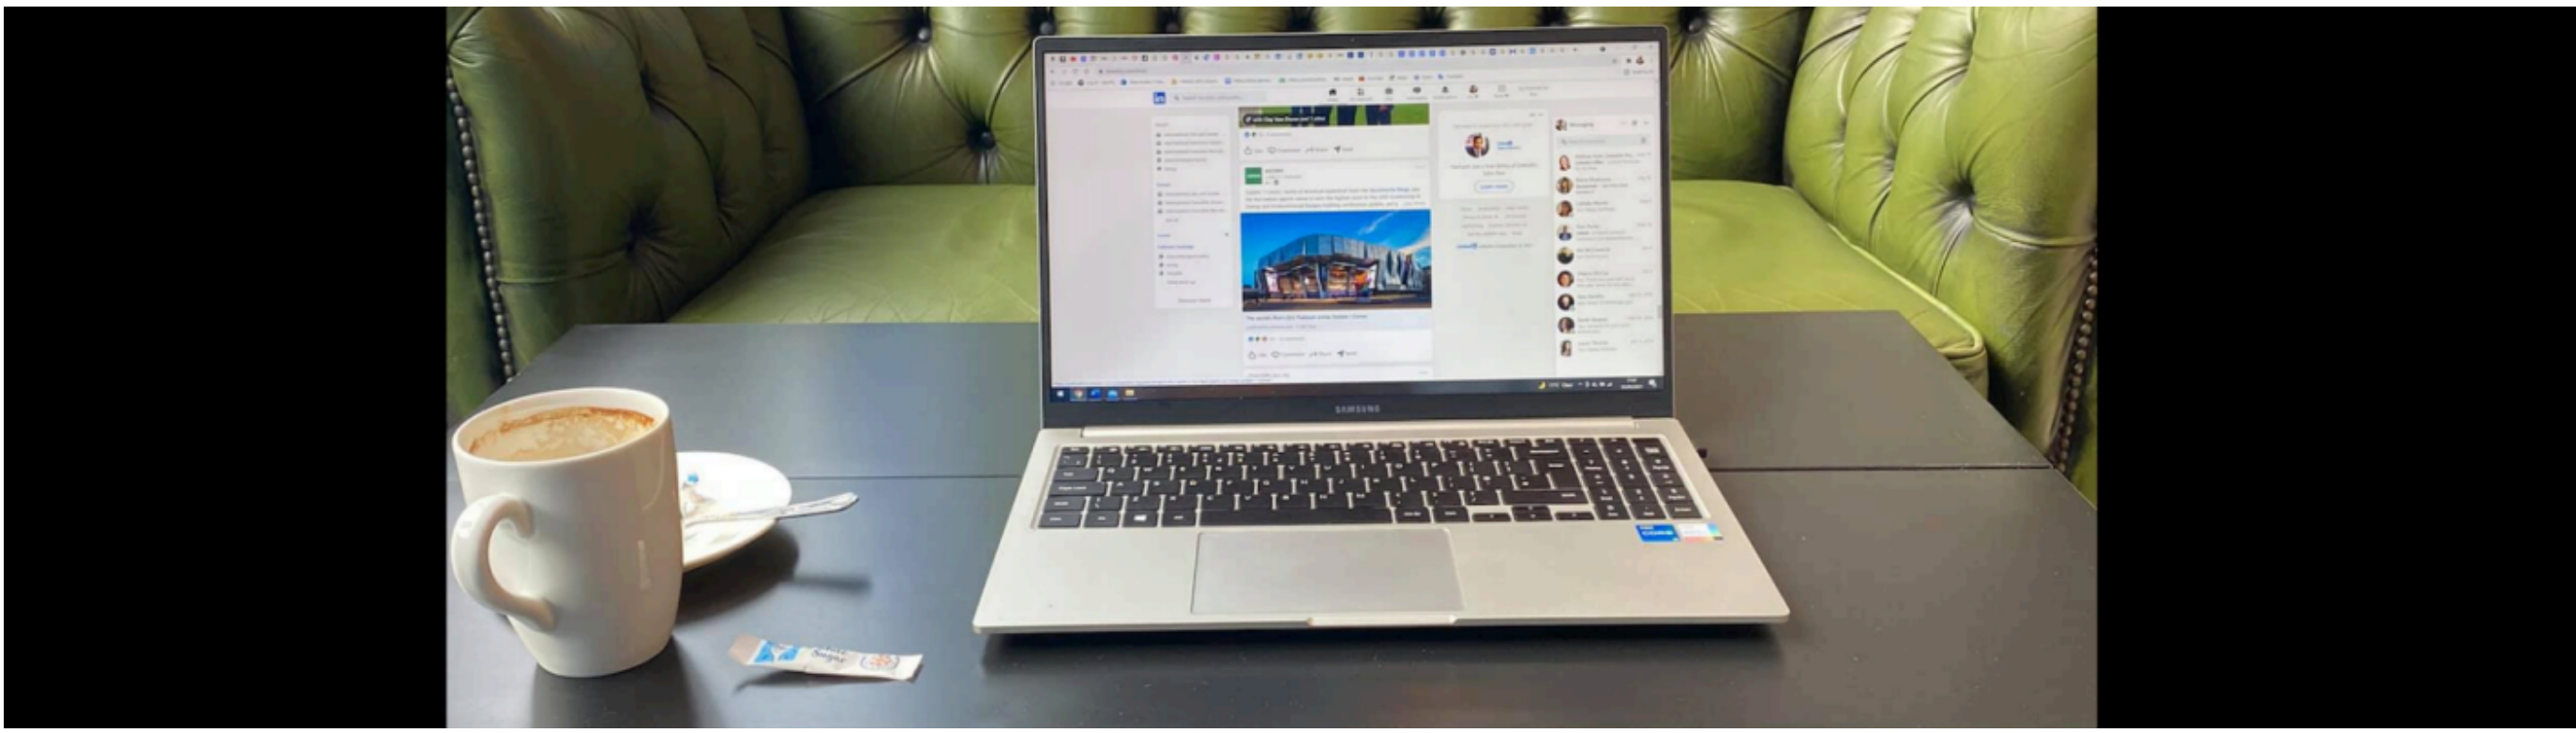

### Topic: Measure of spread

In [1]:
import math 
import statistics as st
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

### Hemant Thapa

### 1. Range 

The difference between the maximum and minimum values in the dataset. In other words, the difference between the highest and lowest scores in a set of data.

#### Range = Maximum Value - Minimum Value

In [2]:
np.random.seed(42)  
data = np.random.normal(loc=50, scale=10, size=100)

In [3]:
data[:5]

array([54.96714153, 48.61735699, 56.47688538, 65.23029856, 47.65846625])

In [4]:
data_range = max(data) - min(data)

In [5]:
data_range

44.72023288598683

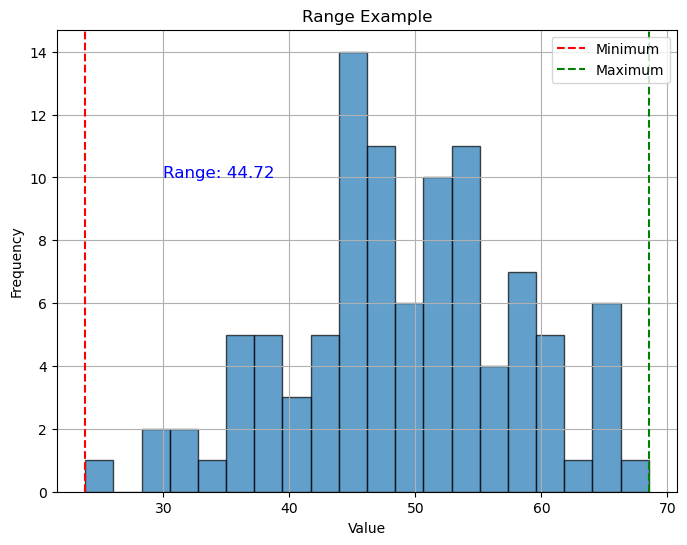

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=min(data), color='red', linestyle='dashed', label='Minimum')
plt.axvline(x=max(data), color='green', linestyle='dashed', label='Maximum')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Range Example')
plt.legend()
plt.text(30, 10, f'Range: {data_range:.2f}', fontsize=12, color='blue')
plt.grid(True)
plt.show()

### 2. Quartile 

If we order a set of scores from the lowest to thte highest the quartiles are the points that divide the score into four equal groups, with a quarter of the scores in each group. the second quartile is the median.

Another way to look spread is to calculate quartile. we saw into "Measures of Central Tendency" that median cuts the ordered data into halves; the quartiles simply cut the ordered data into quartes. The first quarter indicates the score one quarter of the way up the list from the lowest. The second quartile indicates the score two quarters up the list. The second quartile is halfway up the list and is therefore the median. The third quartile is the score three quarters up the list. The four quartile is all the way to the end of the list and so it is the highest score.

Occasionally the zero quartile is referred to the lowest score.

In [7]:
data = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

In [8]:
q1 = np.percentile(data, 25)
# Median is the 50th percentile (Q2)
q2 = np.percentile(data, 50)  
q3 = np.percentile(data, 75)

In [9]:
print("Dataset:", data)
print("Q1 (25th percentile):", q1)
print("Q2 (Median, 50th percentile):", q2)
print("Q3 (75th percentile):", q3)

Dataset: [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
Q1 (25th percentile): 26.25
Q2 (Median, 50th percentile): 37.5
Q3 (75th percentile): 48.75


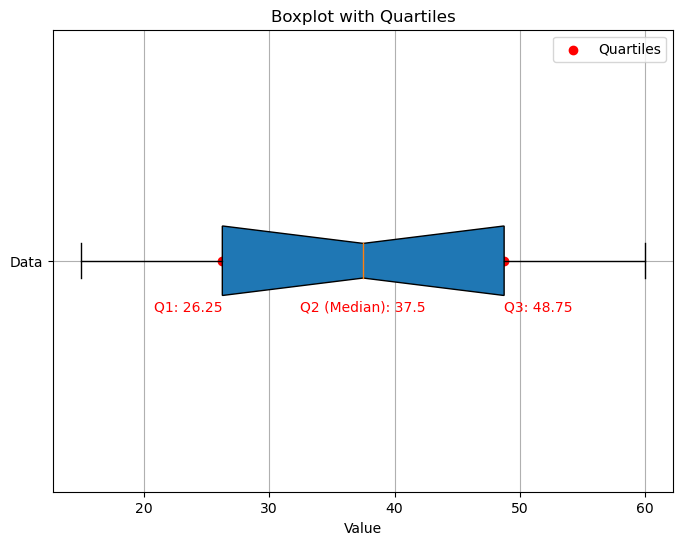

In [10]:
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=False, notch=True, patch_artist=True, labels=['Data'])
plt.scatter([q1, q2, q3], [1, 1, 1], color='red', marker='o', label='Quartiles')

plt.text(q1, 0.9, f'Q1: {q1}', ha='right', va='center', color='red')
plt.text(q2, 0.9, f'Q2 (Median): {q2}', ha='center', va='center', color='red')
plt.text(q3, 0.9, f'Q3: {q3}', ha='left', va='center', color='red')
plt.xlabel('Value')
plt.title('Boxplot with Quartiles')
plt.legend()
plt.grid(True)
plt.show()

## 3. Variation 

Variation refers to the amount of change, dispersion, or diversity present in a set of data. It quantifies how much the individual data points deviate from a central measure, such as the mean or median. In statistical terms, variation provides insights into the spread or distribution of data points within a dataset.

Variation is an essential concept in statistics and data analysis because it helps us understand the diversity or uniformity of data values. When there is little variation, data points tend to be close to a central value, while high variation indicates that data points are spread out over a wider range of values.

#### The variance measures the average squared deviation of data points from the mean. It quantifies the overall spread of the dataset. Mathematically, it can be represented as:

#### Variance = Σ((xi - mean)^2) / (n - 1)

Where xi is each data point, mean is the arithmetic mean, and n is the number of data points.

In simple terms, A measure of how much a set of scores vary from their mean value. Variance is the square of the standard deviation.

In [11]:
dataset = [x**2 for x in range(1, 100,10)]
dataset

[1, 121, 441, 961, 1681, 2601, 3721, 5041, 6561, 8281]

In [12]:
mean = np.mean(dataset)
mean

2941.0

In [13]:
def variance(dataset):
    mean = sum(dataset) / len(dataset)
    variance_sum = 0
    for data_point in dataset:
        variance_sum += ((data_point - mean) ** 2)
    variance = variance_sum / (len(dataset) - 1)
    return variance
result_variance = variance(dataset)

print("Dataset:", dataset)
print("Variance:", result_variance)

Dataset: [1, 121, 441, 961, 1681, 2601, 3721, 5041, 6561, 8281]
Variance: 8345333.333333333


In [14]:
variance(dataset)

8345333.333333333

In [15]:
import statsmodels.api as sm

In [16]:
variance = np.var(dataset, ddof=1)
print("Dataset:", dataset)
print("Variance:", variance)

Dataset: [1, 121, 441, 961, 1681, 2601, 3721, 5041, 6561, 8281]
Variance: 8345333.333333333


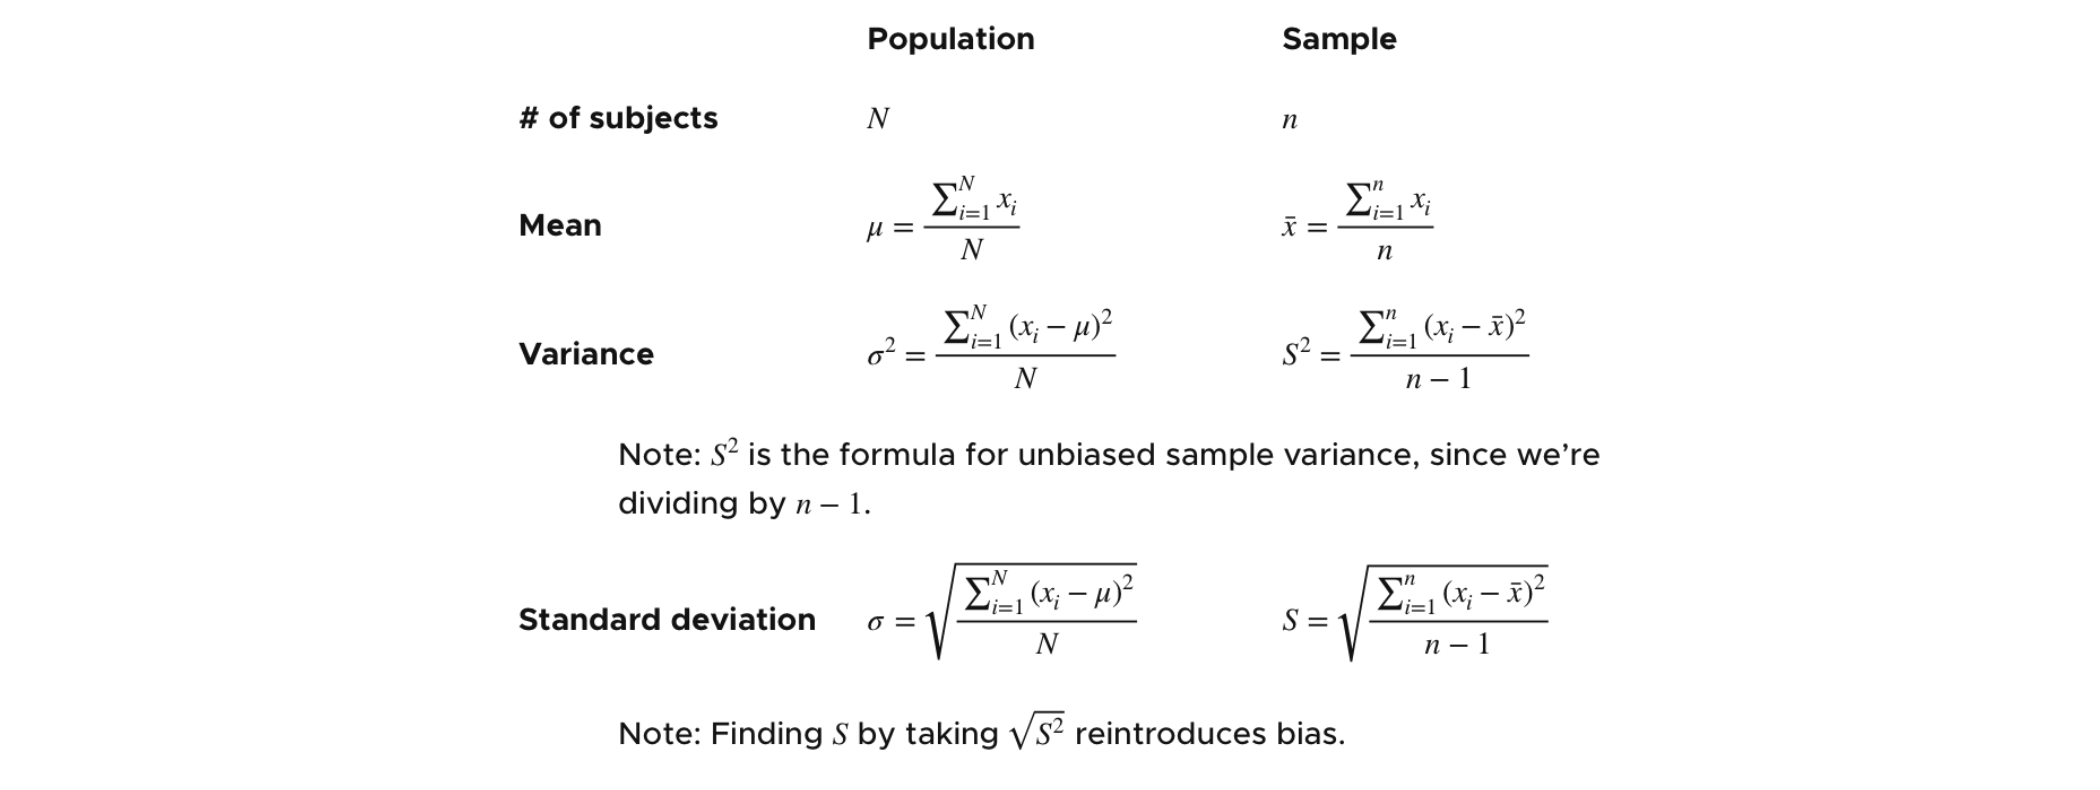

In [17]:
np.random.seed(42)  
population_data = np.random.normal(loc=50, scale=10, size=1000)
sample_data = np.random.choice(population_data, size=100, replace=False)

In [18]:
population_variance = np.var(population_data, ddof=0)
population_variance

95.79049897315173

In [19]:
sample_variance = np.var(sample_data, ddof=1)
sample_variance

108.92461499140428

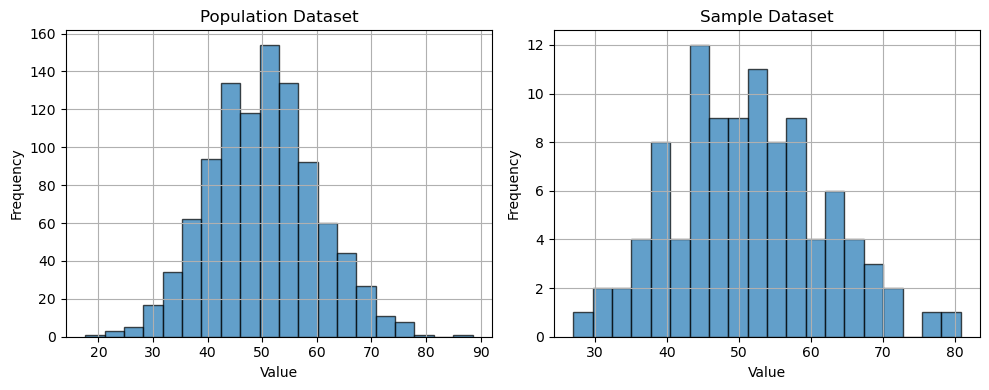

In [20]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(population_data, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Population Dataset')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.hist(sample_data, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Sample Dataset')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
print("Population Variance:", population_variance)
print("Sample Variance:", sample_variance)

Population Variance: 95.79049897315173
Sample Variance: 108.92461499140428


## 4. Standard Deviation 

The standard deviation is the square root of the variance and is often preferred for interpretation as it is in the same unit as the data. It gives an idea of how much individual data points deviate from the mean. Mathematically, it can be represented as:

Standard Deviation = √Variance

#### Population Deviation:

Population deviation (also known as population standard deviation) is a measure of how much the individual data points in an entire population deviate from the population mean.

It is used when we have data for the entire population and we want to understand how much the data points spread around the true population mean.

The population deviation is calculated using the entire dataset and is defined as the square root of the average of the squared differences between each data point and the population mean.

The formula for population deviation is:

Population Deviation (σ) = √(Σ(xi - μ)^2 / N)

Where:
xi is each data point in the population,
μ is the population mean,
N is the total number of data points in the population.

#### Sample Deviation:

Sample deviation (also known as sample standard deviation) is a measure of how much the individual data points in a sample deviate from the sample mean.

It is used when we have a sample from a larger population, and we want to estimate how much the data points in the sample spread around the estimated population mean.

The sample deviation is calculated using a sample from the population, and to correct for the bias introduced by using a sample, it divides the sum of squared differences by (n - 1), where n is the sample size (degrees of freedom correction).

The formula for sample deviation is:

Sample Deviation (s) = √(Σ(xi - x̄)^2 / (n - 1))

Where:
xi is each data point in the sample,
x̄ is the sample mean,
n is the sample size.

In [22]:
population_data[:10]

array([54.96714153, 48.61735699, 56.47688538, 65.23029856, 47.65846625,
       47.65863043, 65.79212816, 57.67434729, 45.30525614, 55.42560044])

In [23]:
population_variance = np.var(population_data, ddof=0)
population_std_dev = np.std(population_data, ddof=0)

In [24]:
sample_data[:10]

array([38.70293145, 56.141667  , 41.42842444, 50.75804558, 57.3846658 ,
       58.20482181, 47.80328112, 50.58208718, 45.12874616, 45.406391  ])

In [25]:
sample_variance = np.var(sample_data, ddof=1)
sample_std_dev = np.std(sample_data, ddof=1)

In [26]:
print("Population Variance:", population_variance)
print("Population Standard Deviation:", population_std_dev)
print("Sample Variance:", sample_variance)
print("Sample Standard Deviation:", sample_std_dev)

Population Variance: 95.79049897315173
Population Standard Deviation: 9.787262077473542
Sample Variance: 108.92461499140428
Sample Standard Deviation: 10.436695597333683


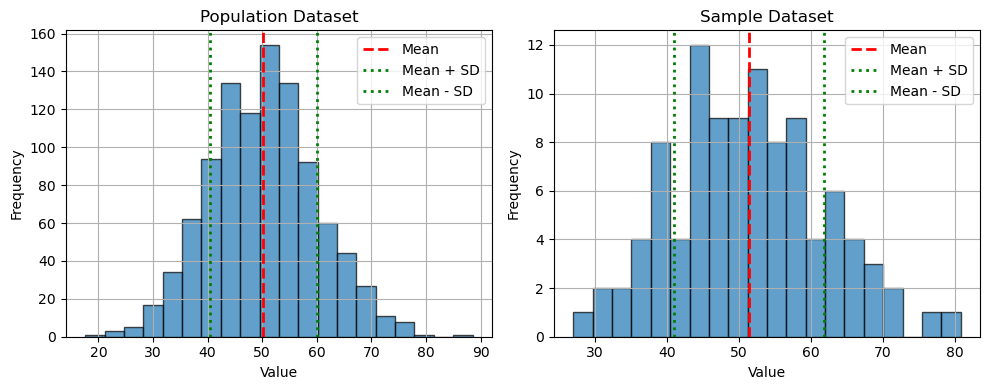

In [27]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(population_data, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=np.mean(population_data), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(x=np.mean(population_data) + population_std_dev, color='green', linestyle='dotted', linewidth=2, label='Mean + SD')
plt.axvline(x=np.mean(population_data) - population_std_dev, color='green', linestyle='dotted', linewidth=2, label='Mean - SD')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Population Dataset')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(sample_data, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=np.mean(sample_data), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(x=np.mean(sample_data) + sample_std_dev, color='green', linestyle='dotted', linewidth=2, label='Mean + SD')
plt.axvline(x=np.mean(sample_data) - sample_std_dev, color='green', linestyle='dotted', linewidth=2, label='Mean - SD')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Sample Dataset')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Absolute deviation

When we subtract the mean value from a score the result (the deviation from the mean) is positive , if the score os larger than mean (xi - mean), if the score is negative if it is smaller. if we ignore the sign of the deviation and always treat it as positive we produce absolute deviation. 

### Standard Deviation Example 

#### What is Mean?
The average of a data set, found by adding all numbers together and then dividing the sum of the numbers by the number of numbers.

In [28]:
score_x = [2,2,3,5]

In [29]:
mean_x = sum(score_x)/len(score_x)

In [30]:
mean_x

3.0

#### What is deviation?
The difference of score from the mean. when we subtract the mean value from a score the result is the deviation. 

In [31]:
deviation = [x - mean_x for x in score_x]

In [32]:
deviation

[-1.0, -1.0, 0.0, 2.0]

#### What is sum of squares? 
The sum of the squared devaitions of scores from their mean value. 

In [33]:
square_deviation = [x**2 for x in deviation]

In [34]:
square_deviation

[1.0, 1.0, 0.0, 4.0]

In [35]:
df_std_dev = pd.DataFrame({"Score":score_x,
                         "Deviation":deviation,
                         "Standard Deviation":square_deviation})

In [36]:
df_std_dev

,Score,Deviation,Standard Deviation
0,2,-1.0,1.0
1,2,-1.0,1.0
2,3,0.0,0.0
3,5,2.0,4.0


#### Variance = sum of squares/ the numbers of scores

In [37]:
variance = sum(df_std_dev['Standard Deviation'])/len(df_std_dev['Standard Deviation'])
variance

1.5

### 5. Degree of Freedom

In statistics, the term "degrees of freedom" (df or d.f.) refers to the number of values in the final calculation of a statistic that are free to vary after certain constraints have been applied to the data. It is a fundamental concept used in various statistical tests and estimations. (df = n - 1) 

Degrees of freedom are closely related to the sample size and the number of parameters being estimated or constraints applied to the data. The idea of degrees of freedom becomes relevant in situations where we have limited information to estimate certain parameters or statistics.



#### Here are some common scenarios where degrees of freedom are important:

1. Sample Variance: When calculating the sample variance, we use (n-1) degrees of freedom, where "n" is the sample size. This adjustment is called Bessel's correction and is used to provide an unbiased estimate of the population variance when using a sample.

2. t-Distribution: In the context of hypothesis testing with the t-distribution, degrees of freedom are used to determine the shape of the distribution. The number of degrees of freedom is determined by the sample size of the data.

3. Chi-Square Test: In the chi-square test for independence, degrees of freedom are calculated based on the dimensions of the contingency table and are used to determine critical values for the test.

4. Linear Regression: In linear regression, the degrees of freedom are related to the number of data points and the number of parameters (slope and intercept) being estimated.

5. ANOVA (Analysis of Variance): In ANOVA, degrees of freedom are used to assess the variability between groups and within groups, based on the number of groups and the sample size.

In [38]:
data = [12, 15, 18, 20, 22, 25]

In [39]:
sample_mean = sum(data) / len(data)

In [40]:
n = len(data)
sample_variance = sum((xi - sample_mean) ** 2 for xi in data) / (n - 1)

In [41]:
print("Dataset:", data)
print("Sample Mean:", sample_mean)
print("Sample Variance (with (n-1) degrees of freedom):", sample_variance)

Dataset: [12, 15, 18, 20, 22, 25]
Sample Mean: 18.666666666666668
Sample Variance (with (n-1) degrees of freedom): 22.266666666666662


## 6. Coefficient of variation (CV)

The coefficient of variation (CV) is a dimensionless statistic that expresses the relative variability of a dataset compared to its mean. It is calculated as the ratio of the standard deviation (σ) to the mean (μ), and then multiplied by 100 to express the result as a percentage.

The formula for calculating the coefficient of variation is:

#### Coefficient of Variation (CV) = (σ / μ) * 100

Where:

σ (sigma) is the standard deviation of the dataset.
μ (mu) is the mean of the dataset.
The coefficient of variation is particularly useful when comparing the variability of different datasets with different units or scales. By expressing the variability as a percentage of the mean, it allows for a standardized comparison of dispersion, regardless of the scale of the data.

A low coefficient of variation indicates that the data points are relatively close to the mean, suggesting low variability or consistency within the dataset. On the other hand, a high coefficient of variation indicates that the data points are more dispersed, suggesting greater variability or inconsistency within the dataset.

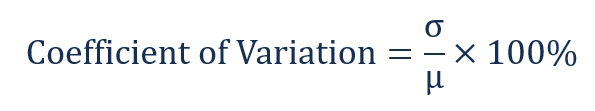

In [42]:
data = [12, 15, 18, 20, 22, 25]
mean = sum(data) / len(data)
n = len(data)
std_dev = (sum((xi - mean) ** 2 for xi in data) / (n - 1)) ** 0.5

In [43]:
coefficient_of_variation = (std_dev / mean) * 100
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Coefficient of Variation:", coefficient_of_variation)

Mean: 18.666666666666668
Standard Deviation: 4.718756898449703
Coefficient of Variation: 25.27905481312341


In [44]:
import yfinance as yf

In [45]:
ticker_symbol = "^FTSE"
stock_data = yf.download(ticker_symbol, period="1y", interval="1d", progress=False)

In [46]:
closing_prices = stock_data["Close"]

Text(0.5, 1.0, 'FTSE100')

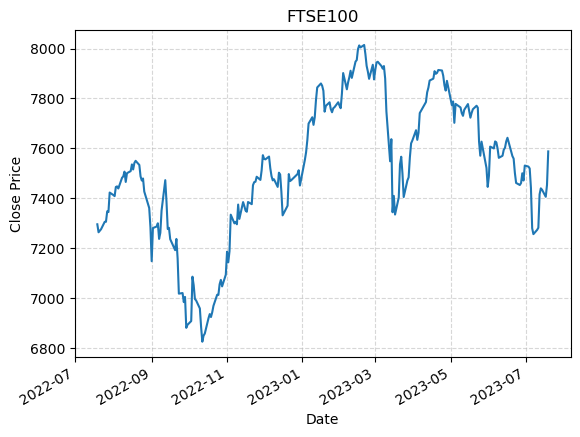

In [47]:
closing_prices.plot();
plt.grid(linestyle="--", alpha=0.5)
plt.ylabel("Close Price")
plt.title("FTSE100")

In [48]:
mean = closing_prices.mean()
std_dev = closing_prices.std()

In [49]:
coefficient_of_variation = (std_dev / mean) * 100

In [50]:
print("Ticker Symbol:", ticker_symbol)
print("Mean Closing Price:", mean)
print("Standard Deviation of Closing Prices:", std_dev)
print("Coefficient of Variation:", coefficient_of_variation)

Ticker Symbol: ^FTSE
Mean Closing Price: 7513.02342781188
Standard Deviation of Closing Prices: 279.28041215113086
Coefficient of Variation: 3.7172839248348986


A coefficient of variation (CV) value of 3.71 for one year of historical stock data means that the relative variability of the stock's closing prices is approximately 3.71%. In other words, the standard deviation of the closing prices is about 3.71% of the mean closing price.

A lower CV value indicates that the closing prices are relatively less variable and closer to the mean, suggesting a more stable or consistent trend in the stock's performance. On the other hand, a higher CV value indicates greater variability and more fluctuations in the closing prices over the one-year period, which may imply higher volatility in the stock's price movements.

#### The coefficient of variation is a relative measure and is best used when comparing the variability of different datasets relative to their means. For example, we can compare the CV values of different stocks or other financial instruments to assess their relative price volatility.

In [51]:
def calculate_cv(closing_prices):
    mean = closing_prices.mean()
    std_dev = closing_prices.std()
    coefficient_of_variation = (std_dev / mean) * 100
    return coefficient_of_variation

In [52]:
ticker_symbol1 = "AAPL"  
ticker_symbol2 = "MSFT"

In [53]:
stock_data1 = yf.download(ticker_symbol1, period="1y", interval="1d", progress=False)
stock_data2 = yf.download(ticker_symbol2, period="1y", interval="1d", progress=False)

In [54]:
closing_prices1 = stock_data1["Close"]
closing_prices2 = stock_data2["Close"]

In [55]:
cv_stock1 = calculate_cv(closing_prices1)
cv_stock2 = calculate_cv(closing_prices2)

In [56]:
print("Stock:", ticker_symbol1)
print("Coefficient of Variation:", cv_stock1)

print("\nStock:", ticker_symbol2)
print("Coefficient of Variation:", cv_stock2)

Stock: AAPL
Coefficient of Variation: 10.4239918980994

Stock: MSFT
Coefficient of Variation: 13.01359810659746


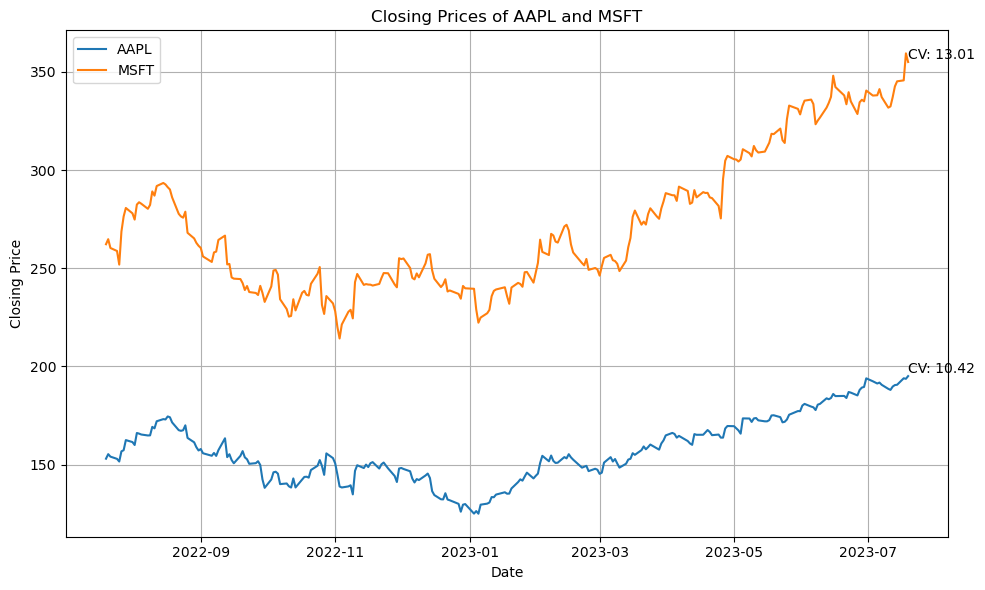

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(closing_prices1, label=ticker_symbol1)
plt.plot(closing_prices2, label=ticker_symbol2)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Prices of {} and {}".format(ticker_symbol1, ticker_symbol2))
plt.legend()
plt.text(stock_data1.index[-1], closing_prices1.iloc[-1], f'CV: {cv_stock1:.2f}', fontsize=10, verticalalignment='bottom')
plt.text(stock_data2.index[-1], closing_prices2.iloc[-1], f'CV: {cv_stock2:.2f}', fontsize=10, verticalalignment='bottom')
plt.grid(True)
plt.tight_layout()
plt.show()

## 7. Some Important Information about Numbers

#### 1. Nominal Data:
Nominal data is a type of categorical data where items are classified into discrete categories with no intrinsic order or ranking. Examples of nominal data include gender (male, female), colors (red, blue, green), and types of fruit (apple, orange, banana). In nominal data, you can only determine whether items are the same or different based on their category.

#### 2. Rank or Rank Order:
Rank or rank order data is a type of ordinal data where items are ranked in a specific order based on their attributes, but the differences between the ranks are not precisely measurable. For example, in a race, participants can be ranked as 1st, 2nd, 3rd, etc. The ranks indicate the order of finish, but the actual differences in performance times may not be uniform.

#### 3. Ordinal Data:
Ordinal data is a type of categorical data that has a meaningful order or ranking, but the differences between the categories are not precisely quantifiable. The categories have a relative order, but the magnitude of the differences is not defined. For example, educational levels (elementary, high school, bachelor's, master's) represent ordinal data, as they have a natural ordering but do not have a consistent measurement scale.

#### 4. Interval Scale:
Interval scale data is a type of quantitative data where the intervals between the data points are meaningful and have consistent units of measurement. However, there is no true zero point on the scale. Temperature measured in Celsius or Fahrenheit is an example of interval scale data. The differences between temperatures are meaningful, but zero degrees Celsius does not represent the complete absence of temperature.

#### 5. Ratio Data:
Ratio data is a type of quantitative data where the intervals between data points are meaningful, and there is a true zero point on the scale, indicating the absence of the measured attribute. Examples of ratio data include height, weight, and income. Ratios can be calculated between data points, allowing for meaningful comparisons and calculations.

#### 6. Interval Data:
Interval data is similar to ratio data, but it lacks a true zero point on the scale. This means that ratios between data points are not meaningful. Examples of interval data include calendar years (e.g., 2000, 2020) and IQ scores. While the differences between intervals are meaningful, the concept of zero is arbitrary in interval data.

#### 7.Ratio Scale:
Ratio scale data is a type of quantitative data that possesses all the properties of interval data, with the added feature of a true zero point on the scale. This true zero allows for meaningful ratios between data points. Examples of ratio scale data include age, income, weight, and length.

### References:

King, K. (n.d.). Mean, Variance, Standard Deviation. Retrieved from: https://www.kristakingmath.com/blog/mean-variance-standard-deviation

Digital Vidya. (n.d.). Coefficient of Variation (CV) – Definition, Formula, and Calculation. Retrieved from: https://www.digitalvidya.com/blog/coefficient-of-variation/

Robinhood. (n.d.). What Is the Coefficient of Variation (CV)? Retrieved from: https://learn.robinhood.com/articles/fTF933xzZSWaXHQO0Wl2T/what-is-the-coefficient-of-variation-cv/

Wall Street Mojo. (n.d.). Coefficient of Variation Formula. Retrieved from: https://www.wallstreetmojo.com/coefficient-of-variation-formula/